<a href="https://colab.research.google.com/github/aztofighi/Image_Augmentation/blob/main/Albumentations_Fast_and_Flexible_Image_Augmentations_keypoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -q https://github.com/albumentations-team/albumentations_examples/archive/master.zip -O /tmp/albumentations_examples.zip
!unzip -o -qq /tmp/albumentations_examples.zip -d /tmp/albumentations_examples
!cp -r /tmp/albumentations_examples/albumentations_examples-master/notebooks/images .
!echo "Images are successfully downloaded"

Images are successfully downloaded


In [ ]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 3.1 MB/s eta 0:00:00
albumentations==1.3.1 is successfully installed


In [ ]:
import os

import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.color import label2rgb
from albumentations.pytorch import ToTensorV2
import albumentations as A
import random

from PIL import Image

In [ ]:
image = cv2.imread('images/keypoints_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
KEYPOINT_COLOR = (0, 255, 0) # Green

def vis_keypoints(image, keypoints, color=KEYPOINT_COLOR, diameter=15):
    image = image.copy()

    for (x, y) in keypoints:
        cv2.circle(image, (int(x), int(y)), diameter, (0, 255, 0), -1)

    plt.figure(figsize=(8, 8))
    plt.axis('off')
    plt.imshow(image)

In [ ]:
keypoints = [
    (100, 100),
    (720, 410),
    (1100, 400),
    (1700, 30),
    (300, 650),
    (1570, 590),
    (560, 800),
    (1300, 750),
    (900, 1000),
    (910, 780),
    (670, 670),
    (830, 670),
    (1000, 670),
    (1150, 670),
    (820, 900),
    (1000, 900),
]

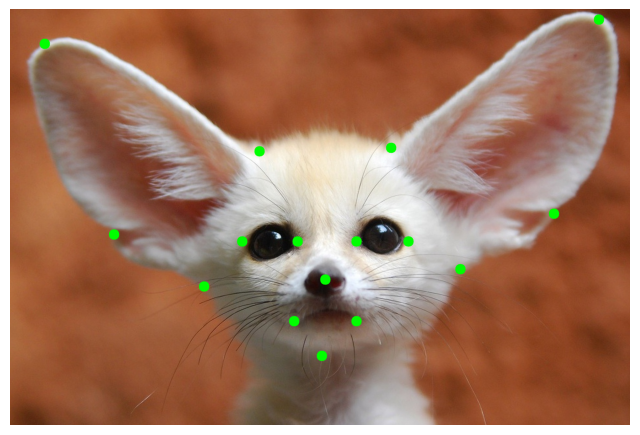

In [ ]:
vis_keypoints(image, keypoints)


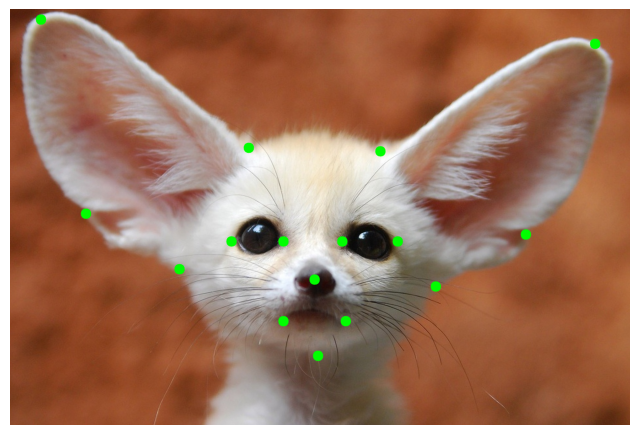

In [ ]:
transform = A.Compose(
    [A.HorizontalFlip(p=1)],
    keypoint_params=A.KeypointParams(format='xy')
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])

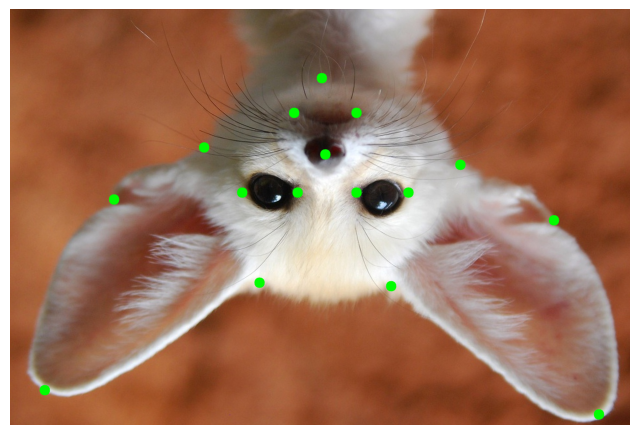

In [ ]:
transform = A.Compose(
    [A.VerticalFlip(p=1)],
    keypoint_params=A.KeypointParams(format='xy')
)
transformed = transform(image=image, keypoints=keypoints)
vis_keypoints(transformed['image'], transformed['keypoints'])